In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pm = pd.read_csv('data/pm2.5.csv', parse_dates=['date'], index_col='date')
pm.head()

,pm2.5
date,
2015-01-01,313.22
2015-01-02,186.18
2015-01-03,87.18
2015-01-04,151.84
2015-01-05,146.60


In [3]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   2007 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [4]:
pm.columns

Index(['pm2.5'], dtype='object')

In [5]:
def null(data_frame): return data_frame[data_frame.isnull().any(axis=1)]
null(pm)

,pm2.5
date,
2017-08-12,NaN
2017-08-13,NaN


In [6]:
def fill_null(data_frame, col_name):
    data_frame[col_name] = data_frame[col_name].interpolate(method='time')
    return data_frame

In [7]:
pm = fill_null(pm, 'pm2.5')
null(pm)

,pm2.5
date,


In [8]:
def line_plot(data_frame, col_name, sep_year = False):
    if sep_year is False:
        data_frame[col_name].plot(figsize = (16,5))
    else:
        sns.relplot(x=data_frame.index, y=col_name, hue=data_frame.index.year, kind='line', data=data_frame)

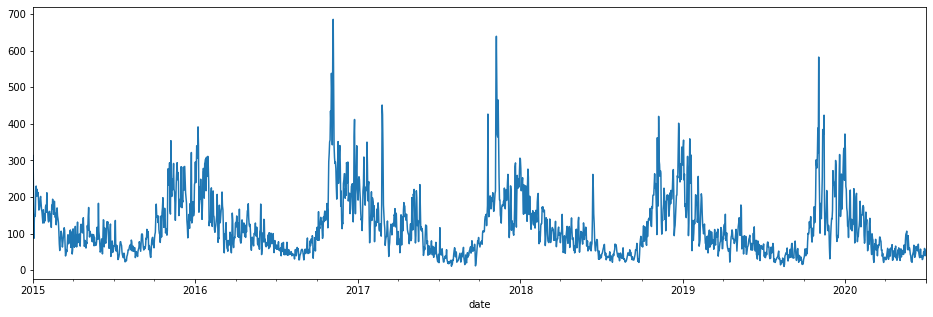

In [9]:
line_plot(pm, 'pm2.5', sep_year=False)


In [10]:
high_anomaly = pm[pm['pm2.5']>400].index.month_name().value_counts() 
high_anomaly

November    12
October      2
December     2
February     2
Name: date, dtype: int64

<AxesSubplot:>

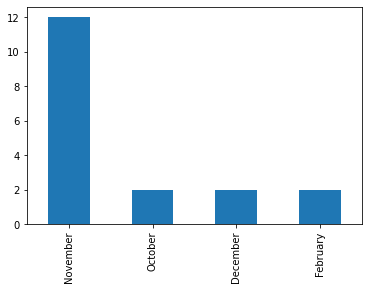

In [11]:
high_anomaly.plot(kind='bar')

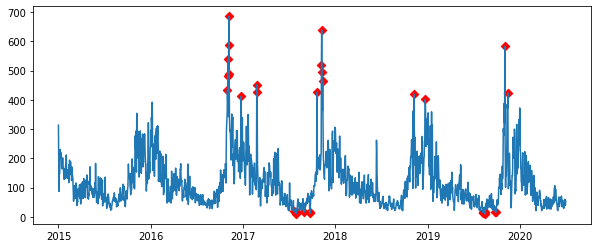

In [12]:
anomalies = pm[(pm['pm2.5']>400) | (pm['pm2.5']<20)]
plt.figure(figsize=(10,4))
plt.plot(pm['pm2.5'])
plt.scatter(anomalies.index, anomalies, color='r', marker='D')

In [13]:

def graph_year(data_frame, col_name, single_chart = False):

    if single_chart is False:
        for i in data_frame.index.year.unique():
            data = data_frame[data_frame.index.year == i]
            plt.plot(data.index.day_of_year, data[col_name])
            plt.title(i)
            plt.show()    
    else:
        sns.lineplot(x=data_frame.index.day_of_year,y=col_name,hue=data_frame.index.year,data=data_frame)

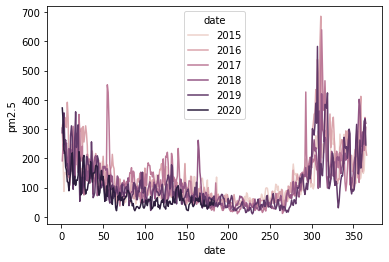

In [14]:
graph_year(pm, 'pm2.5', single_chart = True)


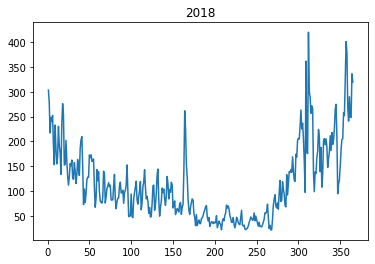

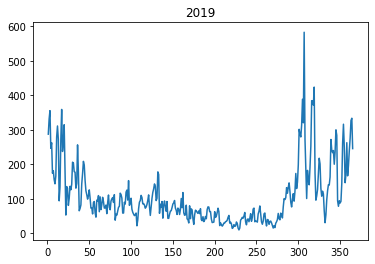

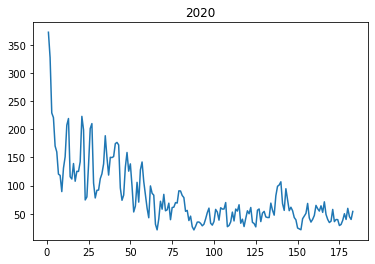

In [15]:
graph_year(pm['2018-01-01': '2020-07-31'], 'pm2.5', single_chart = False)

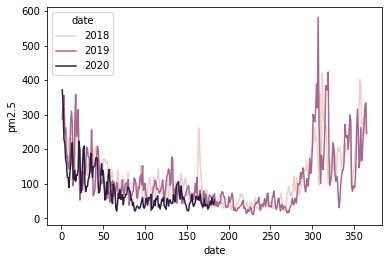

In [16]:
graph_year(pm["2018-01-01": "2020-07-01"], 'pm2.5', single_chart = True)


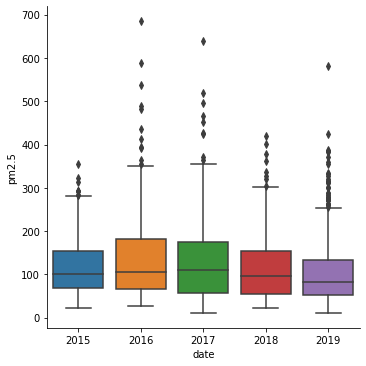

In [17]:
req_range = pm['2015-01-01':'2019-12-31']
sns.catplot(x=req_range.index.year, y='pm2.5', kind='box', data=req_range)

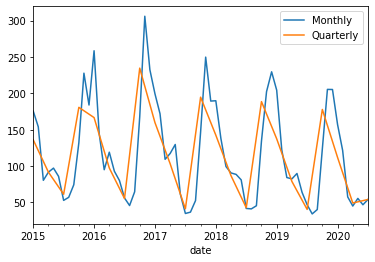

In [18]:
month_sample = pm['pm2.5'].resample('M').mean()
month_sample.plot(label = 'Monthly')

quarterly_sample = pm['pm2.5'].resample('Q').mean()
quarterly_sample.plot(label = 'Quarterly')

plt.legend()

<AxesSubplot:xlabel='date'>

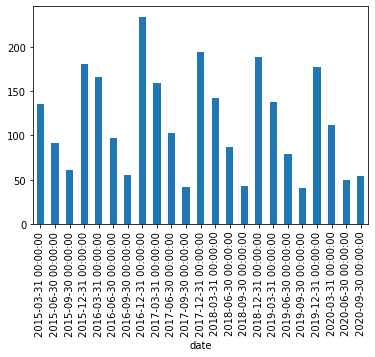

In [19]:
quarterly_sample = pm['pm2.5'].resample('Q').mean()
quarterly_sample.plot(kind='bar')

In [20]:
selected_months = pm[(pm.index.month_name() == 'March') | (pm.index.month_name() == 'April') | (pm.index.month_name() == 'May')]
selected_months.head()

,pm2.5
date,
2015-03-01,71.83
2015-03-02,53.71
2015-03-03,83.49
2015-03-04,91.07
2015-03-05,106.57


In [21]:

selected_months_sample = selected_months['pm2.5'].resample('M').mean().dropna()
selected_months_sample.head()

date
2015-03-31     80.338065
2015-04-30     91.562333
2015-05-31     97.109355
2016-03-31     94.920968
2016-04-30    119.043000
Name: pm2.5, dtype: float64

<AxesSubplot:xlabel='date'>

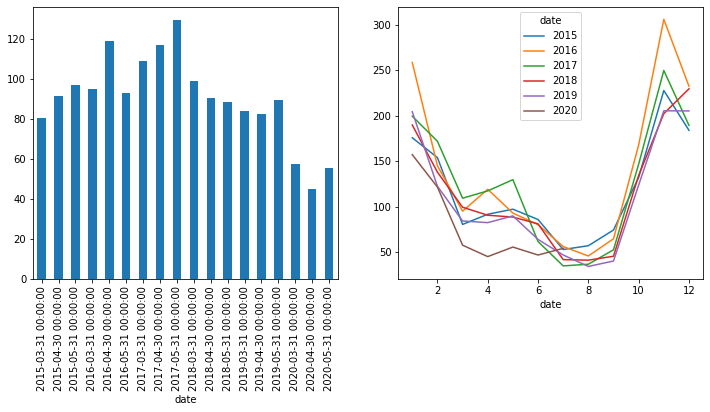

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

selected_months_sample.plot(kind='bar', ax=ax1)
pv = pd.pivot_table(pm, index=pm.index.month, columns=pm.index.year,
                    values='pm2.5', aggfunc='mean')
pv.plot(ax=ax2)

<AxesSubplot:xlabel='pm2.5', ylabel='Density'>

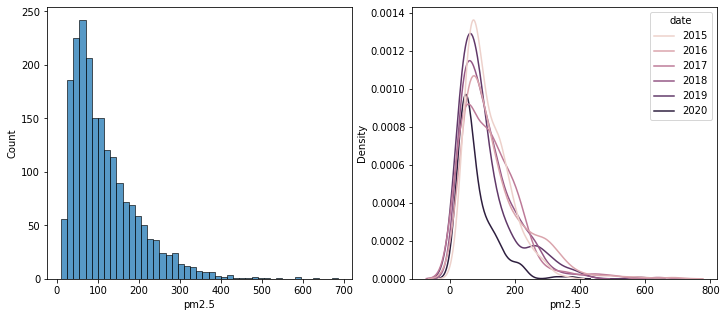

In [23]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

sns.histplot(pm['pm2.5'], ax=ax1)
sns.kdeplot(data=pm, x="pm2.5", hue=pm.index.year, ax=ax2)# yearly distributions

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

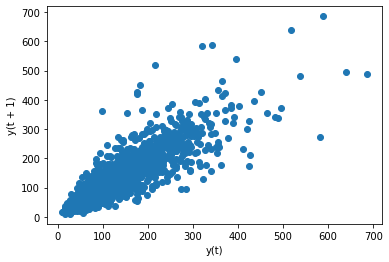

In [24]:
# used to check if the series is random or not
from pandas.plotting import lag_plot
lag_plot(pm['pm2.5'])
# linear implies not random

In [25]:
# https://github.com/bhattbhavesh91/adf-test-stationarity-python/blob/master/augmented-dickey-fuller-test-python.ipynb

from statsmodels.tsa.stattools import adfuller # only works for trend
X = pm['2015-01-01':'2019-12-31']['pm2.5'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -3.654780
p-value: 0.004796
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time Series is Stationary
